In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from IPython.display import Image 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## 1. 넘파이에 대해서 간략하게 설명하세요.

파이썬의 고성능 과학 계산용 라이브러리로, 벡터나 행렬 같은 선형 대수의 표현법을 코드로 처하며, 데터 과학 머신러닝 등 과학 계산의 표준 라이브러리이다.

## 2. (a) 아래 넘파이 배열 A의 dtype, shape, size를 반환 받으세요.

In [2]:
A=np.array([[1,2,3,4],[5,6,7,8]])

In [3]:
print(A.dtype)
print(A.shape)
print(A.size)

int64
(2, 4)
8


## 2. (b) A와 같은 크기의 0으로 이루어진 배열, 1로 이루어진 배열, 3으로 이루어진 배열을 만드세요. (넘파이 함수를 활용하세요)

In [4]:
A=np.array([[1,2,3,4],[5,6,7,8]])

In [5]:
print(np.zeros_like(A))
print(np.ones_like(A))
print(np.full_like(A, 3))

[[0 0 0 0]
 [0 0 0 0]]
[[1 1 1 1]
 [1 1 1 1]]
[[3 3 3 3]
 [3 3 3 3]]


## 3. (a) 아래 넘파이 배열 A가 있을 때, 슬라이싱을 활용한 색인을 통해서 프린트된 배열과 같은 B를 만드세요.

In [6]:
A = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

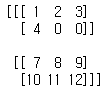

In [7]:
Image("pic1.png")

In [8]:
B = A
B[0,1,1:] = 0
B

array([[[ 1,  2,  3],
        [ 4,  0,  0]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

## 3. (b) 아래 넘파이 배열 A,B,C 에 대해서, np.where 함수를 활용하여, C에서 절댓값이 1보다 큰 요소의 자리에는 A의 값을 아닌 자리에는 B의 값을 갖는 D를 만드세요.  

In [9]:
A=np.zeros((3,2,3))

In [10]:
B=np.ones((3,2,3))

In [11]:
C=np.random.default_rng(seed=12345).standard_normal((3,2,3))

In [12]:
D = np.where(np.abs(C)>1, A, B)
D

array([[[0., 0., 1.],
        [1., 1., 1.]],

       [[0., 1., 1.],
        [0., 0., 1.]],

       [[1., 1., 1.],
        [1., 1., 0.]]])

## 4. (a) 아래와 같은 배열 A가 있을 때, 열방향으로 누적합을 계산하여 각 행이 random walk 한번의 시뮬레이션이 되도록 하세요.

In [13]:
n_simulations=1000
n_steps=1000
A=np.random.default_rng(seed=12345).standard_normal((n_simulations,n_steps))

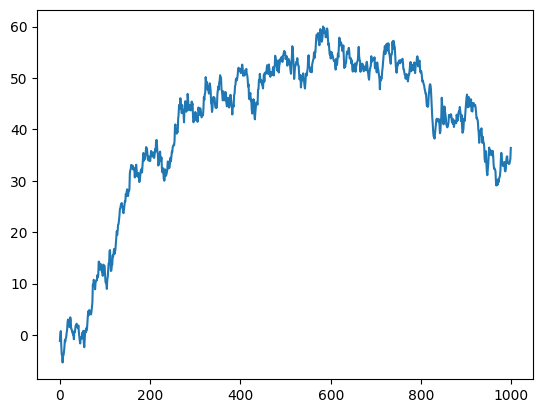

In [15]:
walks = A.cumsum(axis=1)
# 참고용
plt.plot(walks[1])

## 4. (b) 위 (a)에서 계산한 배열을 활용하여, 전체 시뮬레이션 중에서 몇 %의 시뮬레이션이, 처음으로 절댓값이 100을 넘는 스텝이 100을 넘는 지 계산하세요.  

In [19]:
hits100_step = (np.abs(walks) > 100).argmax(axis=1)
print((hits100_step > 100).sum() / n_simulations * 100, '%')

0.7000000000000001 %


## 5. 판다스에 대해서 간략하게 설명하세요.

표 형식의 데이터나 다양한 형태의 데이터를 다룰 수 있게 해주고, 빠르고 효과적인 데이터 분석 도구를 제공한다. 넘파이 배열 기반의 연산 및 함수를 사용하며 넘파이, 사이파이, 사이킷런, 맷플롯립과 함께 사용하는 경우가 많다.

## 6. (a) 아래와 같은 데이터프레임을 D로 만드세요.

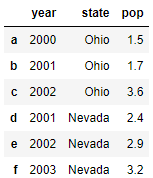

In [20]:
Image("pic2.png")

In [22]:
data = {
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
        }
D = DataFrame(data, index=['a','b','c','d','e','f'])
D

,year,state,pop
a,2000,Ohio,1.5
b,2001,Ohio,1.7
c,2002,Ohio,3.6
d,2001,Nevada,2.4
e,2002,Nevada,2.9
f,2003,Nevada,3.2


## 6. (b) reindex와 그 옵션들을 D에 적용해서 아래와 같은 결과 E로 반환받으세요. 

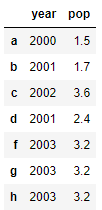

In [23]:
Image("pic3.png")

In [24]:
E = D[['year','pop']].reindex(['a','b','c','d','f','g','h'], method='ffill')
E

,year,pop
a,2000,1.5
b,2001,1.7
c,2002,3.6
d,2001,2.4
f,2003,3.2
g,2003,3.2
h,2003,3.2


## 7. (a) apply 메소드를 활용해서 아래와 같이 A의 각 열별로 절대값이 1을 넘는 요소의 개수를 나타내시오

In [5]:
A = pd.DataFrame(np.random.default_rng(seed=12345).standard_normal((4, 3)),
                    columns=list("bde"),
                    index=["Utah", "Ohio", "Texas", "Oregon"])

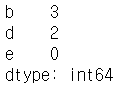

In [26]:
Image("pic4.png")

In [27]:
A.apply(lambda x:(np.abs(x)>1).sum(), axis='index')

b    3
d    2
e    0
dtype: int64

## 7. (b) apply 메소드를 활용해서 아래와 같이 A의 각 행별로 평균값과 합을 'average' 와 'sum' 이름을 갖는 column으로 나타내시오.

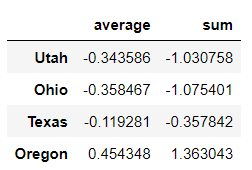

In [28]:
Image("pic5.png")

In [8]:
def f(x):
    return Series([x.mean(), x.sum()], index=["average", "sum"])
A.apply(f, axis='columns')

,average,sum
Utah,-0.343586,-1.030758
Ohio,-0.358467,-1.075401
Texas,-0.119281,-0.357842
Oregon,0.454348,1.363043


## 8. (a) 아래 A와 같은 데이터 프레임이 있을 때, 결측치가 2개 이상 있는 행을 제거한 결과를 반환하시오.

In [30]:
A=pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                    [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])

In [31]:
A.dropna(thresh=2)

,0,1,2
0,1.0,6.5,3.0
3,NaN,6.5,3.0


## 8. (b) A에 대해서 열 별로 이 전값으로 결측치를 채운 결과를 반환하시오.

In [33]:
A=pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                    [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])

In [34]:
A.fillna(method='ffill', axis='index')

/var/folders/9y/9s104_6d69g1krb9mrzdrc6h0000gn/T/ipykernel_6465/2830618801.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  A.fillna(method='ffill', axis='index')


,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0


## 9. (a) 시리즈의 A의 각 원소를 x라고 했을 때, x^3 + x^2 +x +100의 값을 갖는 같은 형태의 시리즈를 반환하시오.

In [35]:
A=pd.Series(np.random.default_rng(seed=12345).standard_normal(10))

In [38]:
A.map(lambda x:x**3+x**2+x+100)

0     97.716964
1    104.878925
2     99.227383
3     99.790589
4     99.929906
5     99.401346
6     97.944120
7    101.343179
8    100.538490
9     94.413228
dtype: float64

## 9. (b) 아래 meat 데이트 프레임에 ounces 열의 각 요소를 제곱한 ounces_square라는 열을 추가로 생성하고 meat 데이터 프레임을 반환하시오.

In [39]:
meat=pd.DataFrame({"food": ["bacon", "pulled pork", "bacon",
                            "pastrami", "corned beef", "bacon",
                            "pastrami", "honey ham", "nova lox"],
                    "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [40]:
meat['ounces_square'] = meat['ounces'] ** 2
meat

,food,ounces,ounces_square
0,bacon,4.0,16.00
1,pulled pork,3.0,9.00
2,bacon,12.0,144.00
3,pastrami,6.0,36.00
4,corned beef,7.5,56.25
5,bacon,8.0,64.00
6,pastrami,3.0,9.00
7,honey ham,5.0,25.00
8,nova lox,6.0,36.00


## 10. 아래 A라는 시리즈에 대해서 최소값과 최소값을 기준으로 균등하게 5구간으로 이산화하고 각 구간에 순서대로 a,b,c,d,e 라는 이름을 매긴 D라는 시리즈를 만드시오. 또한 D를 더미화한 결과를 반환하시오.

In [41]:
A=pd.Series(np.random.default_rng(seed=12345).random(100)*10)

In [43]:
D = pd.Series(pd.cut(A, 5, labels=['a','b','c','d','e']))
pd.get_dummies(D)

,a,b,c,d,e
0,False,True,False,False,False
1,False,True,False,False,False
2,False,False,False,False,True
3,False,False,False,True,False
4,False,True,False,False,False
...,...,...,...,...,...
95,False,True,False,False,False
96,False,True,False,False,False
97,False,False,False,False,True
98,True,False,False,False,False


## 아래 df1, df2에 대해 적절한 데이터 병합을 통해 각 결과와 동일한 결과를 반환하시오.

In [47]:
df1 = pd.DataFrame({"key": ["b", "b", "a",'c'],
                    "data1": pd.Series(range(4), dtype="Int64")})
df2 = pd.DataFrame({"key": ["a","a", "b","b",'d'],
                    "data2": pd.Series(range(5), dtype="Int64")})

## 11.

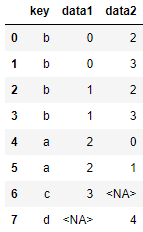

In [48]:
Image("pic6.png")

In [49]:
pd.merge(df1, df2, on='key', how='outer')

,key,data1,data2
0,b,0,2
1,b,0,3
2,b,1,2
3,b,1,3
4,a,2,0
5,a,2,1
6,c,3,<NA>
7,d,<NA>,4


## 12.

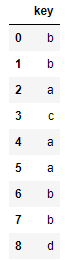

In [50]:
Image("pic7.png")

In [75]:
pd.concat([df1, df2], axis='index', ignore_index=True).iloc[:,:1]

,key
0,b
1,b
2,a
3,c
4,a
5,a
6,b
7,b
8,d


## 13.

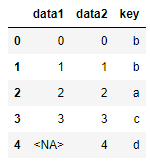

In [53]:
Image("pic8.png")

In [54]:
df1.combine_first(df2)

,data1,data2,key
0,0,0,b
1,1,1,b
2,2,2,a
3,3,3,c
4,<NA>,4,d


## 14~17 아래 tips 데이터를 바탕으로 각 문제에서 요구하는 그래프를 생성하시오.

In [55]:
tips = pd.read_csv("examples/tips.csv")

In [56]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


## 14. (a) tips_partial 데이터프레임을 만드시오. (행은 tips 행의 0~149까지, 열은 tips의 total_bill, tip, smoker만 포함)

In [57]:
tips_partial = tips[['total_bill','tip','smoker']][:150]
tips_partial

,total_bill,tip,smoker
0,16.99,1.01,No
1,10.34,1.66,No
2,21.01,3.50,No
3,23.68,3.31,No
4,24.59,3.61,No
...,...,...,...
145,8.35,1.50,No
146,18.64,1.36,No
147,11.87,1.63,No
148,9.78,1.73,No


## 14. (b) tips_partial 데이터로 figure를 그리시오.
### figsize를 (16,8) 으로 그리시오. 
### 첫번째 plot은 total_bill을 선 그래프로 그리되, 검은선으로 그리고, label을 total_bill로 갖으며, 범례를 나타내시오. 또한 아래 그림과 같이 subplot 이름, y축 이름을 추가하시오.    
### 두번째 plot은 x는 smoker 열,  height은 tip 열을 갖는 bar 그래프를 그리시오.

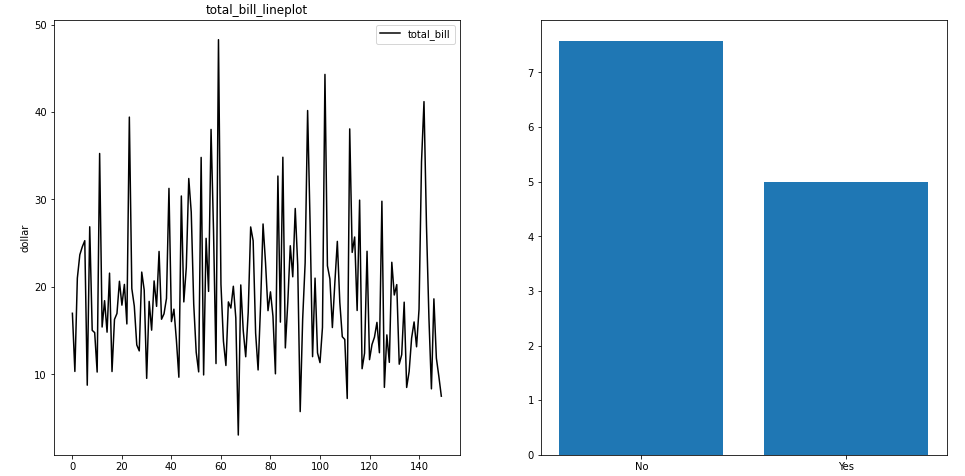

In [58]:
Image("plot1.png")

<BarContainer object of 150 artists>

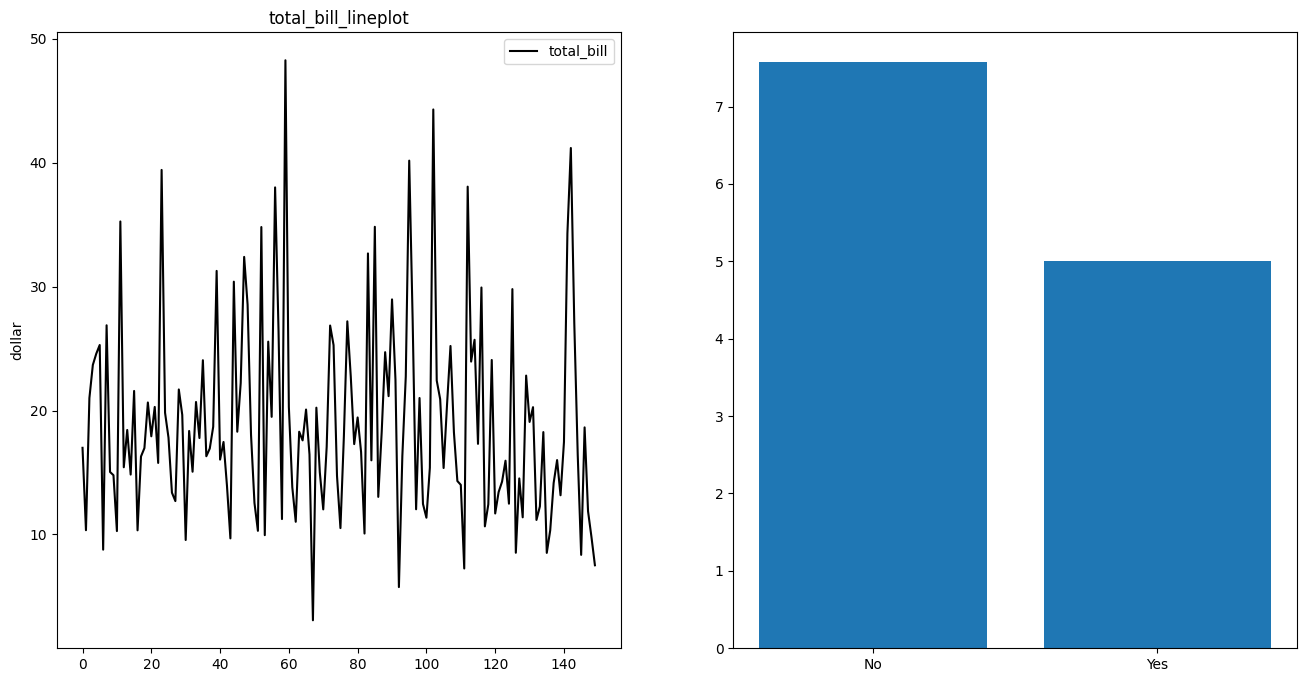

In [60]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(tips_partial['total_bill'],color='black', label='total_bill')
ax1.set_title('total_bill_lineplot')
ax1.set_ylabel('dollar')
ax1.legend()

ax2.bar(tips_partial['smoker'], tips_partial['tip'])

## 15. seaborn을 활용하여 tips 데이터를 바탕으로 아래 figure를 그리시오. (도움말: subplots 활용!)

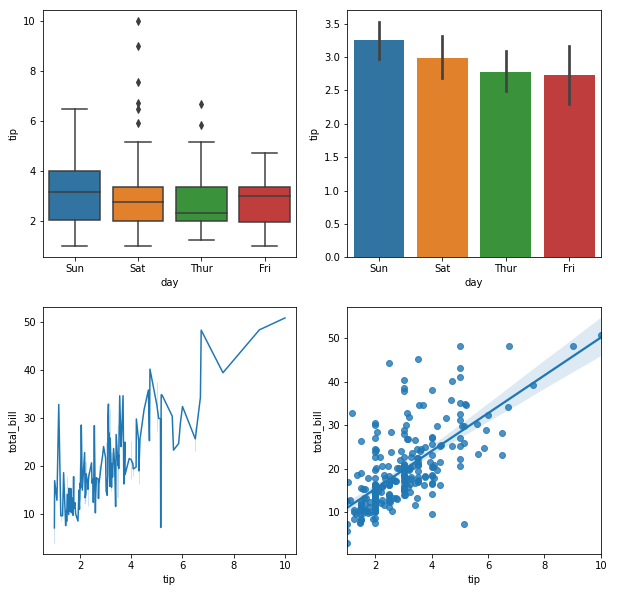

In [61]:
Image("plot2.png")

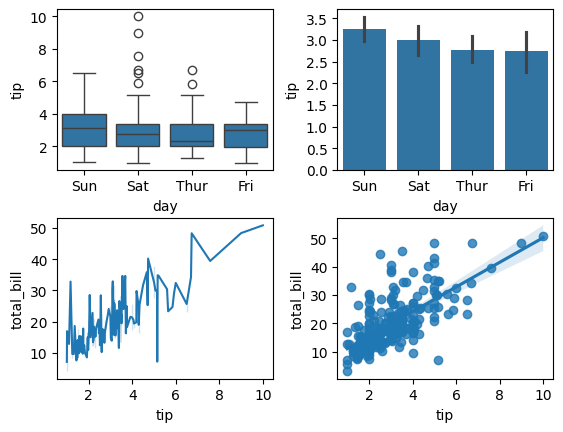

In [64]:
fig,ax = plt.subplots(2,2)
fig.subplots_adjust(wspace=0.3, hspace=0.3)    
sns.boxplot(x='day', y="tip", data=tips, ax=ax[0,0])
sns.barplot(x='day', y='tip', data=tips, ax=ax[0,1])
ax[0,1].set_yticks([0,0.5,1,1.5,2,2.5,3,3.5])
sns.lineplot(x='tip', y='total_bill', data=tips, ax=ax[1,0])
ax[1,0].set_yticks([10,20,30,40,50])
sns.regplot(x='tip', y='total_bill', data=tips, ax=ax[1,1])
ax[1,1].set_yticks([10,20,30,40,50])


## 16. seaborn을 활용하여 tips 데이터를 바탕으로 아래 figure를 그리시오. 

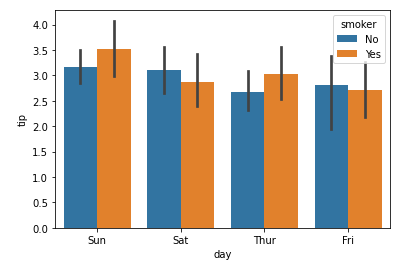

In [65]:
Image("plot3.png")

<Axes: xlabel='day', ylabel='tip'>

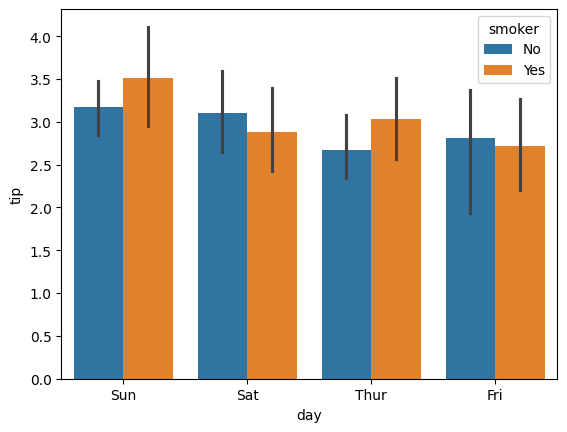

In [66]:
sns.barplot(x='day', y='tip', data=tips, hue='smoker')

## 17. seaborn을 활용하여 tips 데이터를 바탕으로 아래 figure를 그리시오. 

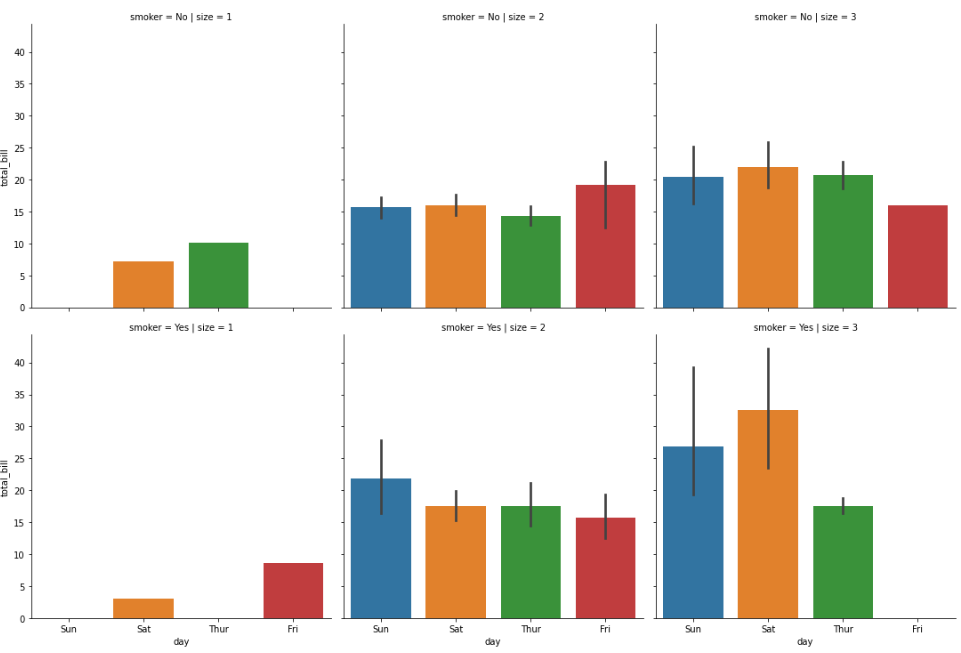

In [67]:
Image("plot4.png")

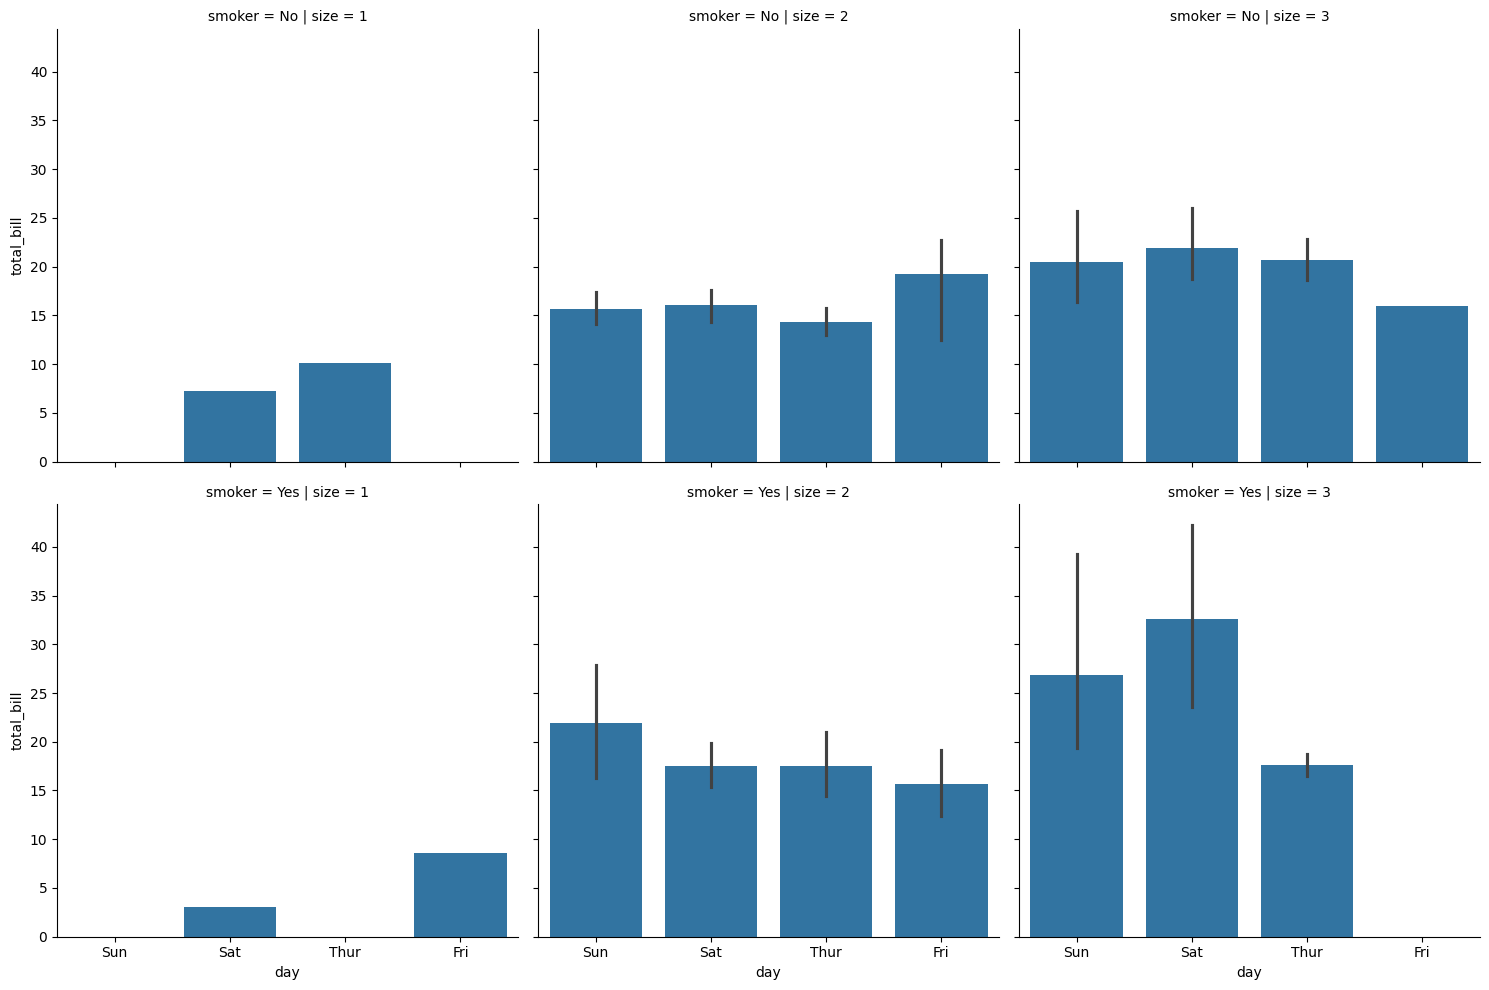

In [68]:
sns.catplot(x="day", y="total_bill", row="smoker",col="size",kind="bar", data=tips[tips['size']<=3])